In [1]:
#used tiingo tenserflow

In [2]:
import pandas_datareader as pdr

In [3]:
df = pdr.get_data_tiingo('AAPL',api_key = '611097048091d2e0731e232a0381386482c5ab88')

C:\Users\Shruti\AppData\Local\Temp\ipykernel_14056\2850544368.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL',api_key = '611097048091d2e0731e232a0381386482c5ab88')


In [4]:
df.to_csv('AAPL.csv')

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('AAPL.csv')

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2019-03-13 00:00:00+00:00,181.71,183.30,180.92,182.25,31032524,43.731638,44.114299,43.541511,43.861598,124130096,0.0,1.0
1,AAPL,2019-03-14 00:00:00+00:00,183.73,184.10,182.56,183.90,23579508,44.217786,44.306833,43.936205,44.258699,94318032,0.0,1.0
2,AAPL,2019-03-15 00:00:00+00:00,186.12,187.33,183.74,184.85,39042912,44.792981,45.084188,44.220193,44.487333,156171648,0.0,1.0
3,AAPL,2019-03-18 00:00:00+00:00,188.02,188.39,185.79,185.80,26219832,45.250248,45.339295,44.713560,44.715967,104879328,0.0,1.0
4,AAPL,2019-03-19 00:00:00+00:00,186.53,188.99,185.92,188.35,31646369,44.891654,45.483695,44.744847,45.329668,126585476,0.0,1.0


In [8]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2024-03-04 00:00:00+00:00,175.10,176.90,173.79,176.15,81510101,175.10,176.90,173.79,176.15,81510101,0.0,1.0
1253,AAPL,2024-03-05 00:00:00+00:00,170.12,172.04,169.62,170.76,95132355,170.12,172.04,169.62,170.76,95132355,0.0,1.0
1254,AAPL,2024-03-06 00:00:00+00:00,169.12,171.24,168.68,171.06,68587707,169.12,171.24,168.68,171.06,68587707,0.0,1.0
1255,AAPL,2024-03-07 00:00:00+00:00,169.00,170.73,168.49,169.15,71765061,169.00,170.73,168.49,169.15,71765061,0.0,1.0
1256,AAPL,2024-03-08 00:00:00+00:00,170.73,173.70,168.94,169.00,76267041,170.73,173.70,168.94,169.00,76267041,0.0,1.0


In [9]:
df1 = df.reset_index()['close']

In [10]:
df1

0       181.71
1       183.73
2       186.12
3       188.02
4       186.53
         ...  
1252    175.10
1253    170.12
1254    169.12
1255    169.00
1256    170.73
Name: close, Length: 1257, dtype: float64

In [11]:
df.shape

(1257, 14)

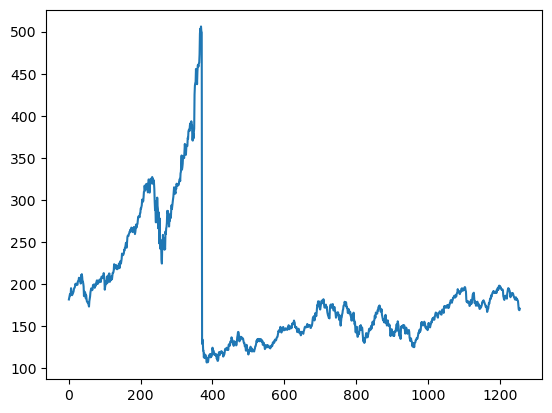

In [12]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [13]:
##LSTM are sensetive to the scale of the data, so we apply MinMax Scaler

In [14]:
import numpy as np

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
df1.shape

(1257, 1)

In [17]:
df1

array([[0.18752661],
       [0.1925861 ],
       [0.19857232],
       ...,
       [0.15599249],
       [0.15569192],
       [0.16002505]])

In [18]:
#splitting the data into train and test split
training_size=int(len(df1)*0.70)
test_size= len(df1) - training_size
train_data,test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [19]:
training_size, test_size

(879, 378)

In [20]:
len(train_data), len(test_data)

(879, 378)

In [21]:
import numpy
#convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX), numpy.array(dataY)

In [22]:
time_step=100
x_train, y_train = create_dataset(train_data,time_step)
x_test, y_test= create_dataset(test_data, time_step)

In [23]:
print(x_train.shape), print(y_train.shape)

(778, 100)
(778,)


(None, None)

In [24]:
print(x_test.shape), print(y_test.shape)

(277, 100)
(277,)


(None, None)

In [25]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test =x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [26]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
##creating Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [28]:
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences =True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100

13/13 [==============================] - 5s 128ms/step - loss: 0.0357 - val_loss: 5.4166e-04
Epoch 2/100
13/13 [==============================] - 1s 62ms/step - loss: 0.0121 - val_loss: 3.9635e-04
Epoch 3/100
13/13 [==============================] - 1s 59ms/step - loss: 0.0114 - val_loss: 0.0013
Epoch 4/100
13/13 [==============================] - 1s 59ms/step - loss: 0.0101 - val_loss: 3.3663e-04
Epoch 5/100
13/13 [==============================] - 1s 56ms/step - loss: 0.0082 - val_loss: 4.8686e-04
Epoch 6/100
13/13 [==============================] - 1s 56ms/step - loss: 0.0074 - val_loss: 2.1506e-04
Epoch 7/100
13/13 [==============================] - 1s 55ms/step - loss: 0.0066 - val_loss: 8.0188e-04
Epoch 8/100
13/13 [==============================] - 1s 55ms/step - loss: 0.0058 - val_loss: 2.7061e-04
Epoch 9/100
13/13 [==============================] - 1s 56ms/step - loss: 0.0058 - val_loss: 2.6712e-04
Epoch 10/100
13/13 [==============================] - 1s 56ms/step

13/13 [==============================] - 1s 57ms/step - loss: 0.0033 - val_loss: 1.3244e-04
Epoch 78/100
13/13 [==============================] - 1s 56ms/step - loss: 0.0032 - val_loss: 1.5979e-04
Epoch 79/100
13/13 [==============================] - 1s 60ms/step - loss: 0.0025 - val_loss: 2.7704e-04
Epoch 80/100
13/13 [==============================] - 1s 60ms/step - loss: 0.0021 - val_loss: 1.7747e-04
Epoch 81/100
13/13 [==============================] - 1s 57ms/step - loss: 0.0020 - val_loss: 1.9325e-04
Epoch 82/100
13/13 [==============================] - 1s 58ms/step - loss: 0.0016 - val_loss: 1.6424e-04
Epoch 83/100
13/13 [==============================] - 1s 57ms/step - loss: 0.0014 - val_loss: 1.3603e-04
Epoch 84/100
13/13 [==============================] - 1s 57ms/step - loss: 0.0013 - val_loss: 1.4632e-04
Epoch 85/100
13/13 [==============================] - 1s 56ms/step - loss: 0.0016 - val_loss: 1.9167e-04
Epoch 86/100
13/13 [==============================] - 1s 57ms/step -

In [31]:
import tensorflow as tf

In [32]:
tf.__version__

'2.15.0'

In [33]:
##prediction and checking performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

9/9 [==============================] - 0s 14ms/step


In [34]:
#transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [35]:
##calculate RMSE performance meetrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

208.85498496408724

In [36]:
##test data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

174.2215155303479

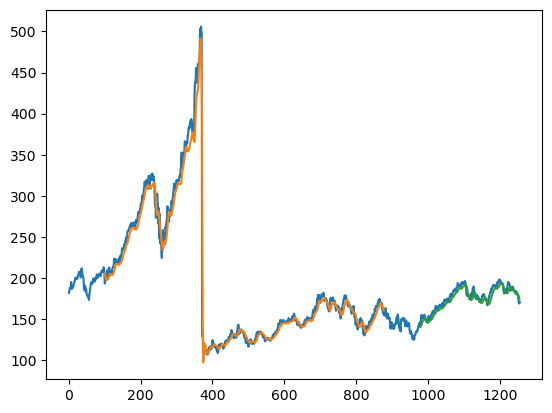

In [37]:
##plotting 
#shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back: len(train_predict)+look_back, :] = train_predict

#shift test predicitions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] = test_predict


# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [38]:
len(test_data)

378

In [39]:
x_input = test_data[278:].reshape(1,-1)
x_input.shape

(1, 100)

In [40]:
temp_input =list(x_input)
temp_input = temp_input[0].tolist()

In [41]:
# demostrate prediction for next 10 days
from numpy import array
lst_output= []
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        #print(x_input)
        yhat= model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

[0.16092546]
101
1 day input [0.1761052  0.17282405 0.17187226 0.16541014 0.16571071 0.16681277
 0.16095178 0.15040701 0.15373826 0.15892298 0.16012523 0.16814026
 0.17715717 0.17485285 0.18131497 0.18780213 0.19048215 0.1892799
 0.19927364 0.19526612 0.20187852 0.2033062  0.20756418 0.20751409
 0.21192235 0.20989355 0.2115717  0.2082154  0.20776456 0.20929242
 0.20671259 0.20816531 0.21139637 0.20686287 0.21685661 0.21410144
 0.2189856  0.22259236 0.21625548 0.22008766 0.22822793 0.22860363
 0.2272511  0.22304321 0.22567314 0.22038823 0.22001252 0.21730745
 0.21592987 0.21618034 0.21725736 0.21462743 0.19737007 0.19388854
 0.18802755 0.18619912 0.19716969 0.19611772 0.19874765 0.19724483
 0.19807138 0.19233563 0.18995617 0.20485911 0.21219787 0.21803381
 0.22126487 0.21956168 0.21873513 0.21435191 0.21262367 0.20338134
 0.19426425 0.2004258  0.19789606 0.20247965 0.20653726 0.20681277
 0.20408265 0.20541014 0.20115216 0.19586725 0.19363807 0.19291171
 0.18902943 0.18715091 0.18905448 

10 day output [[0.14418751]]
11 day input [0.16012523 0.16814026 0.17715717 0.17485285 0.18131497 0.18780213
 0.19048215 0.1892799  0.19927364 0.19526612 0.20187852 0.2033062
 0.20756418 0.20751409 0.21192235 0.20989355 0.2115717  0.2082154
 0.20776456 0.20929242 0.20671259 0.20816531 0.21139637 0.20686287
 0.21685661 0.21410144 0.2189856  0.22259236 0.21625548 0.22008766
 0.22822793 0.22860363 0.2272511  0.22304321 0.22567314 0.22038823
 0.22001252 0.21730745 0.21592987 0.21618034 0.21725736 0.21462743
 0.19737007 0.19388854 0.18802755 0.18619912 0.19716969 0.19611772
 0.19874765 0.19724483 0.19807138 0.19233563 0.18995617 0.20485911
 0.21219787 0.21803381 0.22126487 0.21956168 0.21873513 0.21435191
 0.21262367 0.20338134 0.19426425 0.2004258  0.19789606 0.20247965
 0.20653726 0.20681277 0.20408265 0.20541014 0.20115216 0.19586725
 0.19363807 0.19291171 0.18902943 0.18715091 0.18905448 0.1941891
 0.18955542 0.18614903 0.18983093 0.18680025 0.1851221  0.18239198
 0.17097057 0.15849718 

20 day output [[0.13194041]]
21 day input [0.20187852 0.2033062  0.20756418 0.20751409 0.21192235 0.20989355
 0.2115717  0.2082154  0.20776456 0.20929242 0.20671259 0.20816531
 0.21139637 0.20686287 0.21685661 0.21410144 0.2189856  0.22259236
 0.21625548 0.22008766 0.22822793 0.22860363 0.2272511  0.22304321
 0.22567314 0.22038823 0.22001252 0.21730745 0.21592987 0.21618034
 0.21725736 0.21462743 0.19737007 0.19388854 0.18802755 0.18619912
 0.19716969 0.19611772 0.19874765 0.19724483 0.19807138 0.19233563
 0.18995617 0.20485911 0.21219787 0.21803381 0.22126487 0.21956168
 0.21873513 0.21435191 0.21262367 0.20338134 0.19426425 0.2004258
 0.19789606 0.20247965 0.20653726 0.20681277 0.20408265 0.20541014
 0.20115216 0.19586725 0.19363807 0.19291171 0.18902943 0.18715091
 0.18905448 0.1941891  0.18955542 0.18614903 0.18983093 0.18680025
 0.1851221  0.18239198 0.17097057 0.15849718 0.15599249 0.15569192
 0.16002505 0.16092546 0.15791894 0.15570071 0.15394136 0.15241259
 0.15098585 0.1495995

In [42]:
day_new = np.arange(1,101)
day_pred=np.arange(101,131)

In [43]:
import matplotlib.pyplot as plt

In [44]:
len(df1)

1257

In [45]:
df3=df1.tolist()
df3.extend(lst_output)

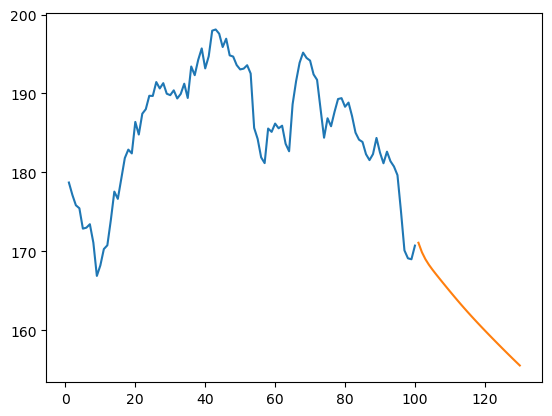

In [47]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))


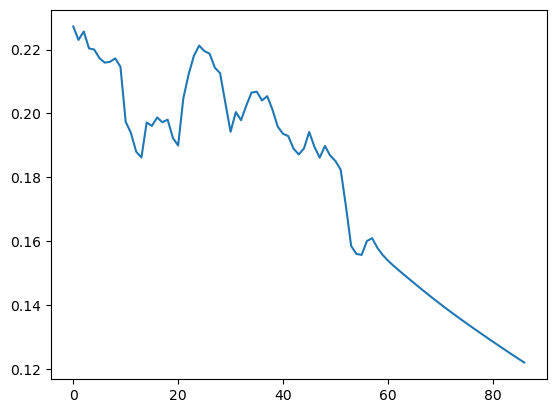

In [48]:
#complete output
plt.plot(df3[1200:])